In [1]:
#Main file for prelim ICIC data analysis workshop 2023
#AUTHOR: ecarter | Aug 2023

#Import relevant modules
import equations as eqn
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#Exercise 1
omega = [0.2, 0.3, 0.4, 0.5]
z = np.linspace(0,2,100) #Equally spaced values between 0 and 2
z = np.delete(z,0) #remove first value from list (0)
h = 0.7
distmods = [] #Empty array to hold all mu for each omega across all z

fig, ax = plt.subplots()

#For each value of omega in list:
for omegai in omega:
    #Calculate once for each omega_m:
    s    = eqn.calc_s(omegai)
    eta1 = eqn.calc_eta(s, 1)
    #For each value of z generated in range 0>z>2:
    for zj in z:
        #Calculate for every z:
        opz = 1+zj #To circumvent a bug in eta_opz
        eta_opz = eqn.calc_eta(s, 1/opz)
        D_l  = eqn.calc_D_l(zj, eta1,eta_opz)
        mu = eqn.calc_mu(zj,h,D_l)
        distmods.append(mu)

    #Plot current data for a given omega_m
    ax.plot(distmods, z, label = r'$\Omega_{m} =$'+'{}'.format(omegai))
    #Clean array for calculation with a new omega_m
    distmods = []

#Plot formatting
plt.legend(loc='lower right')
ax.set_xlabel(r'$\mu (z)$' + ' (mag)')
ax.set_ylabel('$z$')
ax.set_title('Theoretical $\mu (z)$ against $z$')
plt.show()

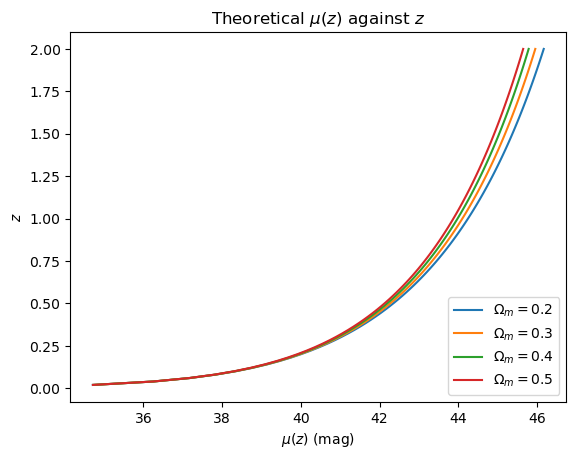

In [2]:
#Exercise 1
omega = [0.2, 0.3, 0.4, 0.5]
z = np.linspace(0,2,100) #Equally spaced values between 0 and 2
z = np.delete(z,0) #remove first value from list (0)
h = 0.7

fig, ax = plt.subplots()

for i in range(0,len(omega)):
    mu = eqn.calc_mu_across_z(omega[i],h, z)
    ax.plot(mu, z, label = r'$\Omega_{m} =$'+'{}'.format(omega[i]))

#Plot formatting
plt.legend(loc='lower right')
ax.set_xlabel(r'$\mu (z)$' + ' (mag)')
ax.set_ylabel('$z$')
ax.set_title('Theoretical $\mu (z)$ against $z$')
plt.show()

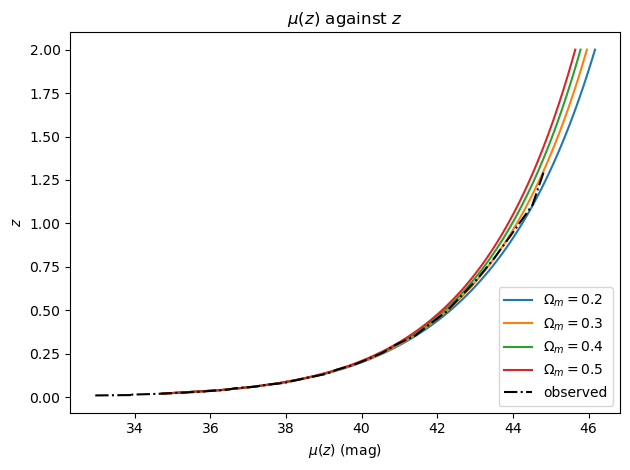

In [3]:
#Exercise 2
obs_data = pd.read_csv('jla_mub.txt', sep=' ')

fig, ax = plt.subplots()

#Calculate and plot theoretical data
for i in range(0,len(omega)):
    mu = eqn.calc_mu_across_z(omega[i],h, z)
    ax.plot(mu, z, label = r'$\Omega_{m} =$'+'{}'.format(omega[i]))

#Plot observational data
ax.plot(obs_data['mu'],obs_data['z'], label = 'observed',ls ='-.', c='k')

#Plot formatting
plt.legend(loc='lower right')
ax.set_xlabel(r'$\mu (z)$' + ' (mag)')
ax.set_ylabel('$z$')
ax.set_title('$\mu (z)$ against $z$')
fig.tight_layout()
plt.show()

In [4]:
#Exercise 3
sim_data = pd.DataFrame()

sim_data['z'] = np.random.uniform(0,2,20)
omega = 0.3
h = 0.7

sim_data['mu'] = eqn.calc_mu_across_z(omega,h,sim_data['z'])

sim_data

,z,mu
0,0.606393,42.773386
1,1.518989,45.223542
2,1.288580,44.782977
3,1.643842,45.434689
4,0.257714,40.586106
5,1.459715,45.117028
6,0.361220,41.432579
7,1.523162,45.230881
8,0.234991,40.358606
9,0.935897,43.926133


In [5]:
#Exercise 4
sim_data['err'] = np.abs(np.random.normal(0,0.1,20))
sim_data

,z,mu,err
0,0.606393,42.773386,0.120580
1,1.518989,45.223542,0.128243
2,1.288580,44.782977,0.075991
3,1.643842,45.434689,0.016395
4,0.257714,40.586106,0.009387
5,1.459715,45.117028,0.034697
6,0.361220,41.432579,0.101754
7,1.523162,45.230881,0.054701
8,0.234991,40.358606,0.027360
9,0.935897,43.926133,0.063409


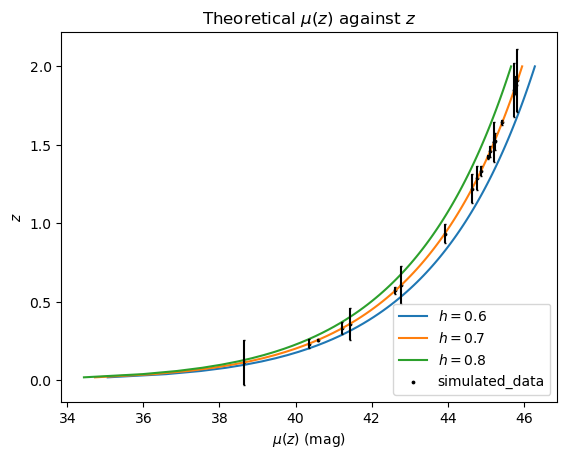

In [19]:
#Exercise 5
omega=0.3
h=[0.6,0.7,0.8]

fig, ax = plt.subplots()

for h_i in h:
    mu = eqn.calc_mu_across_z(omega,h_i,z)
    ax.plot(mu, z, label = r'$h= $'+'{}'.format(h_i))

ax.errorbar(sim_data['mu'],sim_data['z'],sim_data['err'], fmt='none', capsize=1, ecolor='black')
ax.scatter(sim_data['mu'],sim_data['z'], label='simulated_data', s=3, c='k')

#Plot formatting
plt.legend(loc='lower right')
ax.set_xlabel(r'$\mu (z)$' + ' (mag)')
ax.set_ylabel('$z$')
ax.set_title('Theoretical $\mu (z)$ against $z$')

plt.show()